# Lab 1. Classroom air temperature analysis.
Let's analyze some of the temperature data we collected in class on Wednesday. First, we need to lay out two testable hypotheses:
## Hypothesis 1: Consistent measurement technique reduced the spread (standard deviation) of the temperature measurements.
We'll test this by comparing the data collected <b>before</b> and <b>after</b> I gave you the instructions.
## Hypothesis 2: The "before" and "after" temperature data are different enough to be considered two different data sets.
We'll evaluate this hypothesis using a statistical test called a Student's T-Test.
## Key assumption: The air temperature in the room was actually constant the entire class period. 
This might be a faulty assumption if, for example, the air conditioner kicked in at some point between the "before" and "after" data sets. I deliberately timed this exercise for midway through the class period in order to allow the room temperature to stabilize. The air temperature had to equilibrate after the introduction of body heat and computers turning on at the start of the class period.
## The following lines loads some needed modules into your Python namespace.
Let's not worry about exactly what they do just yet. To execute the lines, highlight the cell and hit Ctrl+Enter.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## First, load the data.
I downloaded a copy of the spreadsheet we created on Wednesday as a Comma-Seperated Value (CSV) text file called "SC231.csv". I had to clean up a few blank lines and other typos, but it's more or less unchanged from how we entered it.

Let's load the data into our Python notebook using a module called <a href = "https://pandas.pydata.org/">Pandas</a>, which is a powerful data analysis package. We nicknamed it "pd" in when we imported it in the block above. Note that I pass a couple of extra arguments to read_csv() to make Pandas interpret the times as times. 


In [2]:
data = pd.read_csv("SC231.csv", parse_dates=[0], infer_datetime_format=True)

This line produces no output, just reads the CSV file into an object called "data". 
### To force Python to print the contents of "data", simply type:

In [3]:
data

,Time (automatic),Temperature (deg C),Thermometer number,Observer's initials,QC flag (0 = good; 1 = suspect),QC initials
0,2021-08-25 10:03:34,26.0,6.0,CB,0,ML
1,2021-08-25 10:04:56,25.9,1.0,BM,0,ML
2,2021-08-25 10:04:29,25.5,9.0,BA,0,ML
3,2021-08-25 10:04:21,25.5,5.0,DH,0,AL
4,2021-08-25 10:03:30,23.0,10.0,TP,1,ML
...,...,...,...,...,...,...
161,2021-08-25 10:18:03,24.1,10.0,NL,0,NaN
162,2021-08-25 10:17:49,24.5,7.0,DH,1,RT
163,2021-08-25 10:18:00,25.8,8.0,BM,0,NaN
164,2021-08-25 10:18:21,25.2,3.0,JH,0,NaN


### It looks a lot like the spreadsheet we entered on Wednesday. 
Under the hood, Python is treating this data set as something called a DataFrame object.  The "..." means there are some lines of the Dataframe not being printed, so it doesn't clutter up the entire screen. The data are all there!

### Pandas has a lot of useful functionality right out of the box. 
For example, to create a simple graph of the temperature vs. time, type

<AxesSubplot:xlabel='Time (automatic)'>

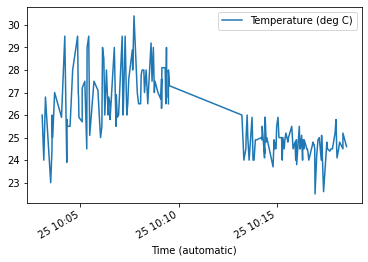

In [4]:
data.plot("Time (automatic)", "Temperature (deg C)")

Note that the column labels <b>must</b> be typed <b>exactly</b> as they are written in the Dataframe. Capitalization and punctuation have to be exactly the same, or Python will throw an error.

Pandas is assuming the data are a time series and connecting them with lines. In fact, they are disparate points. Let's make a scatterplot instead.

<AxesSubplot:xlabel='Time (automatic)', ylabel='Temperature (deg C)'>

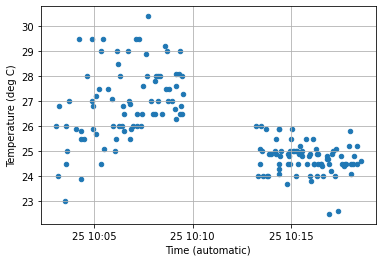

In [5]:
data.plot.scatter("Time (automatic)", "Temperature (deg C)", grid = True)

This looks more like the chart we made in Google Sheets. Our conclusions still hold: Before we received instructions at about 10:10 a.m., the spread of the data was much larger. Before we go on, let's have some fun with these data.

### To print the contents of a single variable, type, e.g., 

In [6]:
data["Temperature (deg C)"]

0      26.0
1      25.9
2      25.5
3      25.5
4      23.0
       ... 
161    24.1
162    24.5
163    25.8
164    25.2
165    24.5
Name: Temperature (deg C), Length: 166, dtype: float64

### To extract the temperature values as an array, add ".values".

In [7]:
data["Temperature (deg C)"].values

array([26. , 25.9, 25.5, 25.5, 23. , 27. , 27. , 25.9, 26.8, 26. , 29. ,
       24.5, 24.5, 29.5, 23.9, 26.8, 24. , 25. , 29.5, 25.8, 25.7, 28. ,
       29.5, 25.5, 27.2, 27.1, 26.8, 29. , 27.5, 26.5, 27.5, 25.1, 28.5,
       26. , 25. , 26. , 26. , 25.9, 28. , 26. , 26. , 25.8, 27. , 29. ,
       26.5, 26.9, 25.5, 29.5, 29.5, 26. , 28. , 27.6, 26.5, 26.5, 28.9,
       30.4, 27. , 26.5, 28. , 27.8, 28. , 27.5, 26.3, 27. , 26.5, 29.2,
       28. , 27.5, 26.5, 29. , 27. ,  nan, 28.1, 27. , 26.7, 27.6, 28.1,
       29. , 26.8, 26.5, 27.3, 28. , 24.7, 24.5, 24. , 25.1, 24.3, 24. ,
       25.5, 25. , 24. , 26. , 25. , 24. , 24.9, 24.8, 24.9, 24.8, 25. ,
       25.9, 24.5, 24.1, 24.5, 26. , 24.9, 25. , 25.9, 24.9, 25. , 25.5,
       25. , 25.9, 25.9, 25.5, 24.5, 23.8, 23.7, 25. , 25.2, 24. , 24.5,
       24.9, 25. , 24.8, 24.9, 25. , 24.5, 24. , 24. , 25.5, 24.9, 24.8,
       24.9, 25.1, 24.5, 24.5, 24.5, 24. , 24.5, 24.9, 24.5, 24.8, 24.2,
       24.4, 24.5, 24.9, 24.8, 22.5, 25. , 24.7, 22

Note there is one "NaN" (not a number) where someone didn't enter a number. This shouldn't be a show-stopper; most downstream functions are NaN-robust.

### Let's make a histogram of the temperatures:

Text(0, 0.5, 'Frequency')

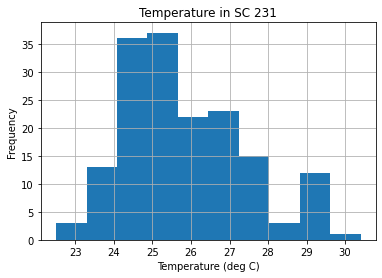

In [8]:
data.hist("Temperature (deg C)")
plt.title("Temperature in SC 231")
plt.xlabel("Temperature (deg C)")
plt.ylabel("Frequency")

### We can also make a box-and-whisker plot.

<AxesSubplot:>

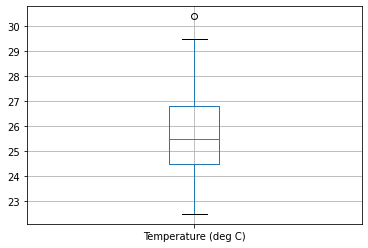

In [9]:
data.boxplot("Temperature (deg C)")

### We can break down the temperatures by thermometer number:

Text(0.5, 0.98, '')

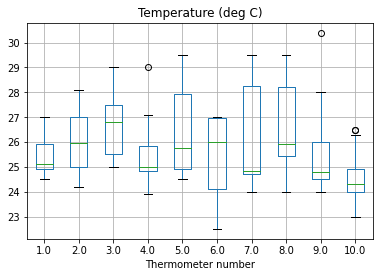

In [10]:
data.boxplot("Temperature (deg C)", by = "Thermometer number")
plt.suptitle('')

### In theory, all 10 thermometers should be identical and give similar readings. You could, for example, use this type of plot to identify thermometers that have stopped working properly and that need to be replaced.

### We can also break down the temperatures by observer:

Text(0.5, 0.98, '')

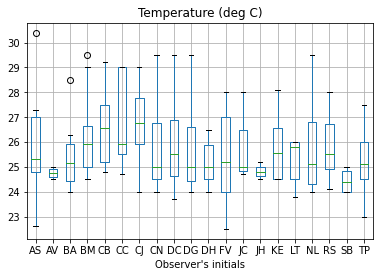

In [11]:
data.boxplot("Temperature (deg C)", by = "Observer's initials")
plt.suptitle('')

### From here, we can see which observers had the hottest data, the coldest data, the largest spread, and the smallest spread.

# Let's get back to our hypotheses:
## Hypothesis 1: Consistent measurement technique reduced the spread (standard deviation) of the temperature measurements.
Recall that I gave you instructions at about 10:10 a.m. This makes a convenient break point in the data. Let's label the data depending on whether they were collected before or after I gave you the instructions.

### Define a variable called instruction_time:

In [12]:
instruction_time = pd.to_datetime('2021-08-25T10:10:00')

Don't worry about the odd appearance of this code. I'm forcing the time to be in the same format as it is in the DataFrame.

### Now, label data "Before" and "After" depending on whether they were collected before or after this time. 

In [13]:
data["Instructions"] = "Before"
data.loc[data['Time (automatic)'] > instruction_time, "Instructions"] = "After"
data

,Time (automatic),Temperature (deg C),Thermometer number,Observer's initials,QC flag (0 = good; 1 = suspect),QC initials,Instructions
0,2021-08-25 10:03:34,26.0,6.0,CB,0,ML,Before
1,2021-08-25 10:04:56,25.9,1.0,BM,0,ML,Before
2,2021-08-25 10:04:29,25.5,9.0,BA,0,ML,Before
3,2021-08-25 10:04:21,25.5,5.0,DH,0,AL,Before
4,2021-08-25 10:03:30,23.0,10.0,TP,1,ML,Before
...,...,...,...,...,...,...,...
161,2021-08-25 10:18:03,24.1,10.0,NL,0,NaN,After
162,2021-08-25 10:17:49,24.5,7.0,DH,1,RT,After
163,2021-08-25 10:18:00,25.8,8.0,BM,0,NaN,After
164,2021-08-25 10:18:21,25.2,3.0,JH,0,NaN,After


A new column has been appended to the DataFrame called "data", containing labels "Before" and "After".

### Are the sizes of the two data sets comparable?
Use the "groupby" function of the Dataframe to separate out the "Before" and "After" data.

In [1]:
data.groupby("Instructions")["Temperature (deg C)"].count()

NameError: name 'data' is not defined

The answer is yes, they are almost exactly the same size.

### Now, let's check their standard deviations to test the hypothesis:

In [15]:
data.groupby("Instructions")["Temperature (deg C)"].std()

Instructions
After     0.630575
Before    1.466358
Name: Temperature (deg C), dtype: float64

### The hypothesis is confirmed: Data spread decreased by more than a factor of two as a result of consistent measurement technique. 

## Take-home point 1: Using consistent measurement technique reduces the chances of systematic error adversely affecting your measurements.
We have 80+ measurements of the same variable. In the field, you may find yourself in situations where one or two measurements are all you get for a given variable and time. Make sure they aren't afflicted by poor measurement technique!

## Hypothesis 2: The "before" and "after" temperature data are different enough to be considered two different data sets.
We can evaluate this graphically by making box-and-whisker plots of the two data sets.

Text(0, 0.5, 'Temperature (deg C)')

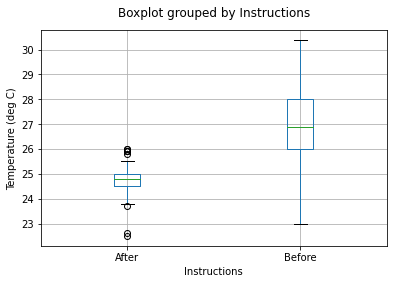

In [16]:
data.boxplot("Temperature (deg C)", by = "Instructions")
plt.title('')
plt.ylabel("Temperature (deg C)")

### It can be seen that the means of the Before and After data (green lines) differ by more than 2.0 deg C.

### As an initial test, we can check whether the interquartile ranges overlap. 
In this case, they certainly do not. This is a good indication that the two data sets (Before and After) were drawn from two different populations.

## However, we want to evaluate this hypothesis statistically to quantify how certain we are that the two data sets are different. We define a <i>null hypothesis</i> to go along with our hypothesis:
$$H_0: \mu_{After} = \mu_{before}$$
### In words, Null hypothesis: The means of the "Before" and "After" data are equal. 
$$H_a: \mu_{After} \ne \mu_{before}$$
### In words, Alternative hypothesis: The means of the "Before" and "After" data are different. 
This situation satisfies all the conditions for a two-sided Student's T-test, including:
1. The two data sets are independent of one another (i.e., not paired).
2. The variances of the two data sets can be expected to be equal, because we used the same thermometers to take the measurements. 

### Fortunately, Python has a Student's T-test built into the Scipy package. Let's import it:

In [17]:
from scipy.stats import ttest_ind

We use a different type of import statement when we just want to import one function rather than an entire module.

In [2]:
T_before = data.loc[data["Instructions"] == "Before"]["Temperature (deg C)"].values
T_after = data.loc[data["Instructions"] == "After"]["Temperature (deg C)"].values
ttest_ind(T_before, T_after, nan_policy = 'omit')

NameError: name 'data' is not defined

### What does this result mean?
The first number is the t-statistic; the second value is the p-value. 
### We're more interested in the P-value.
Typically, for a two-sided T-test:
If P > 0.05 (5%), we do not reject the null hypothesis.
If P < 0.05, we reject the null hypothesis and consider the alternative hypothesis to be more likely.

### In this case, you should find that the P-value is tiny. $$P \sim10^{-26}$$ 
This means that the odds of these data having been drawn from the same population <i>by chance</i> is exceedingly small.
### We therefore reject the null hypothesis that the two temperature sets have the same mean; i.e., the two data sets are different. It is more likely that the alternative hypothesis, i.e., that the two data sets are different, is true.

## Take home point 2: If we had kept the "Before" data, we would have come to an incorrect conclusion about the temperature of the room. 
Again, this reinforces the idea that proper and consistent measurement technique is critically important if we are to accurately assess the condition of the atmosphere!

# Extra Credit question (5 pts): What if we had excluded all of the data where the QC flag was set to 1 (suspect)? Would our conclusion be any different?